### Import Libraries

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Create Dataset

In [3]:
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

### Visualize the Data

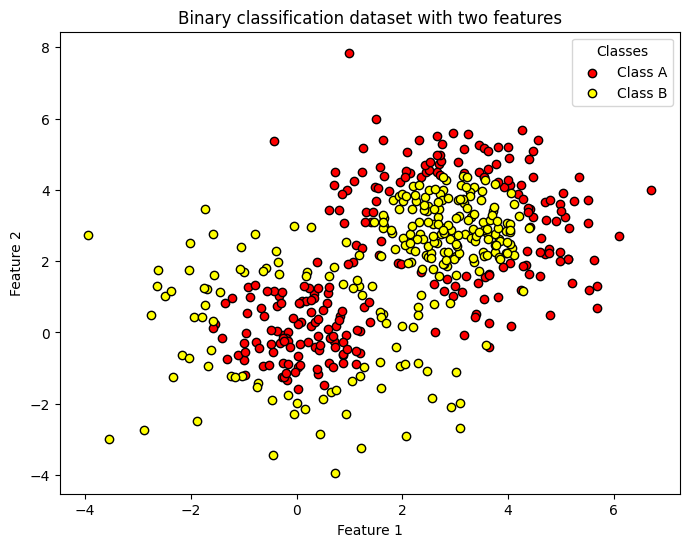

In [4]:
colors = ['red', 'yellow']
feature_names = ['Feature 1', 'Feature 2']
class_names = ['Class A', 'Class B']

# Plotting the original dataset with original class names
plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=class_names[i], edgecolor='k')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Binary classification dataset with two features")
plt.legend(title="Classes")
plt.show()

### Train-Test Split

In [8]:
# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(f"Size of training set is {X_train.shape[0]}")
print(f"Size of test set is {X_test.shape[0]}")

Size of training set is 400
Size of test set is 100


### Fit the AdaBoost Classifier

In [11]:
weak_learner = DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(estimator=weak_learner, 
                         n_estimators=100, 
                         random_state=42)
clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

### Visualize Decision Boundaries and Intermediate Trees

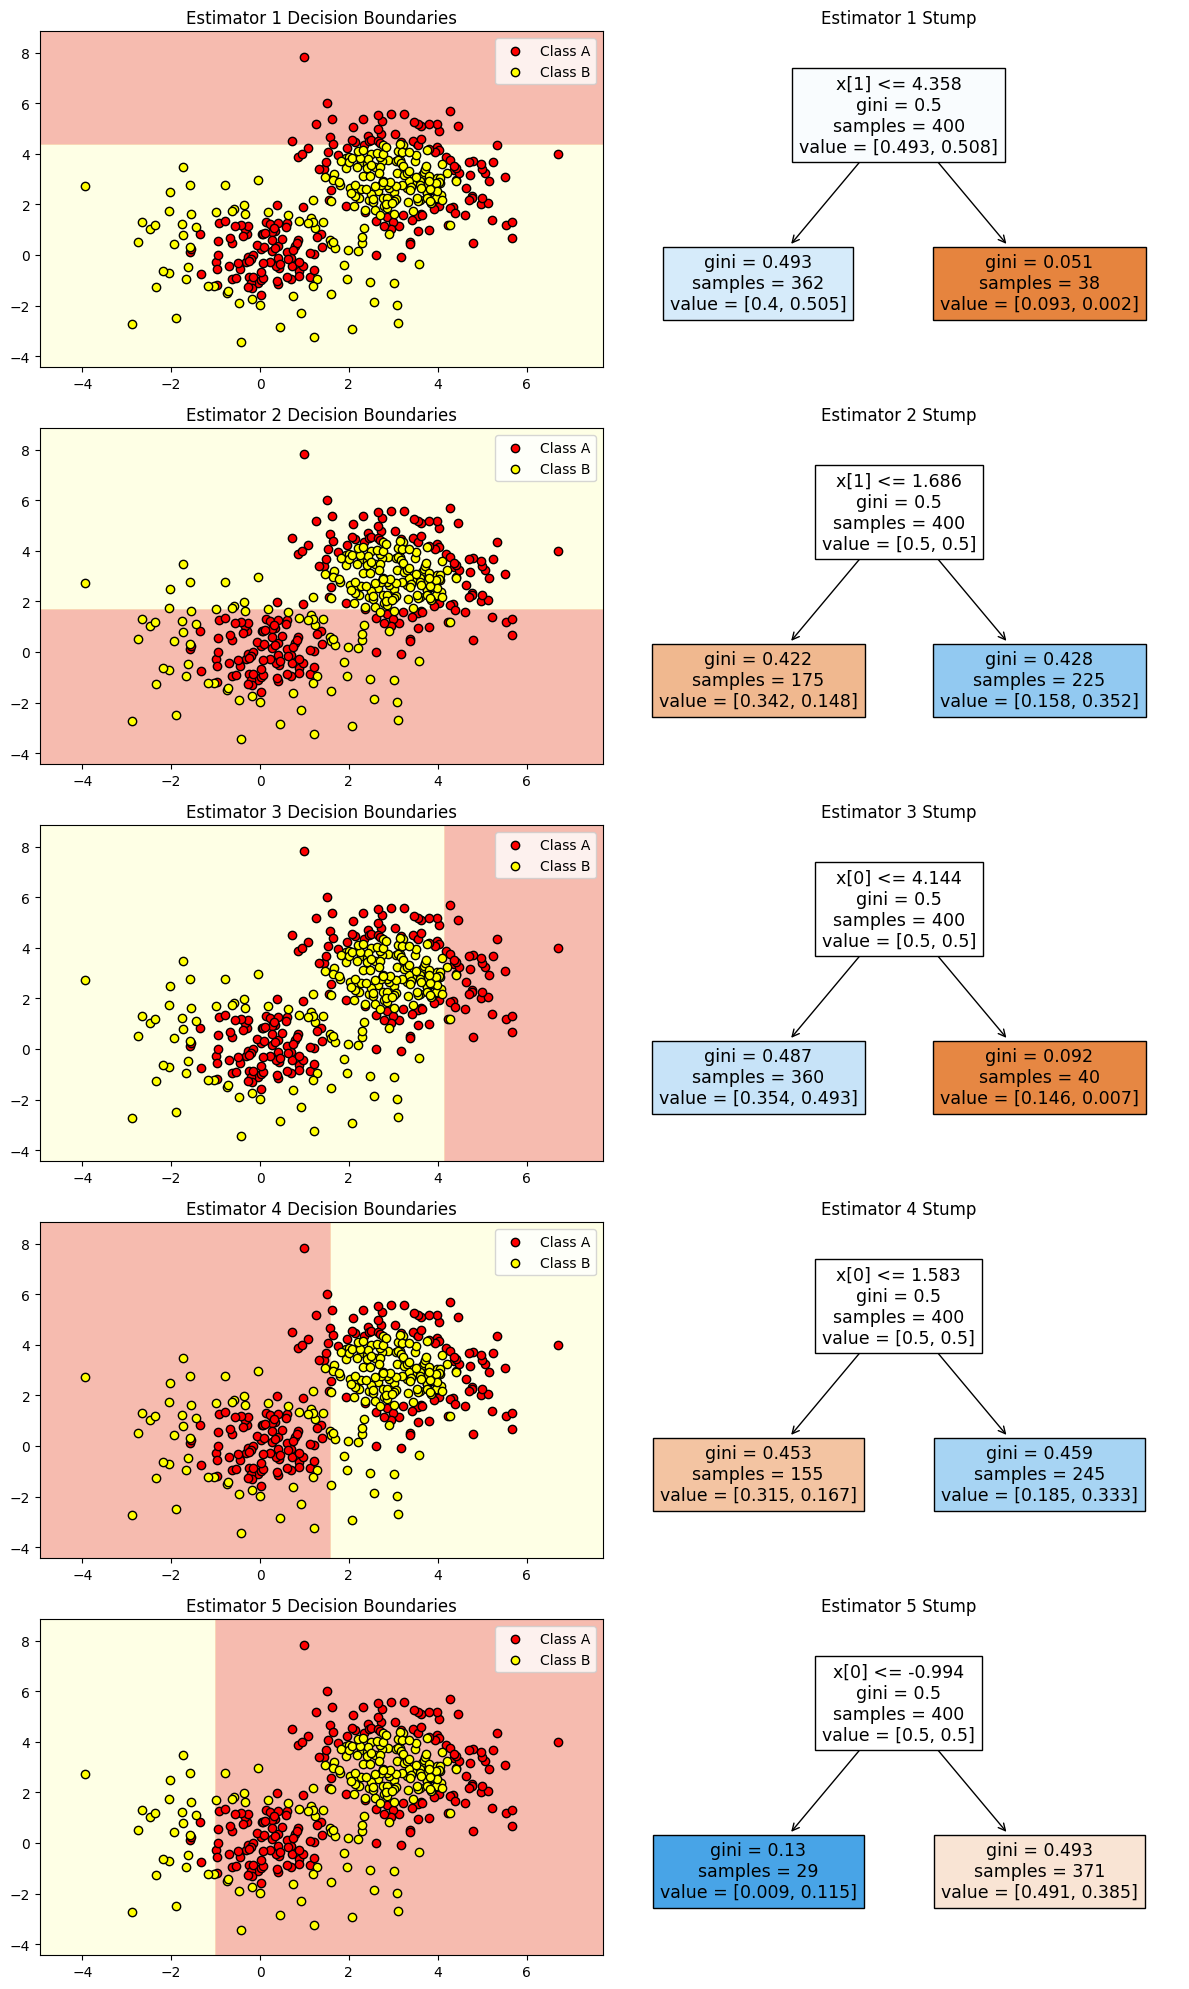

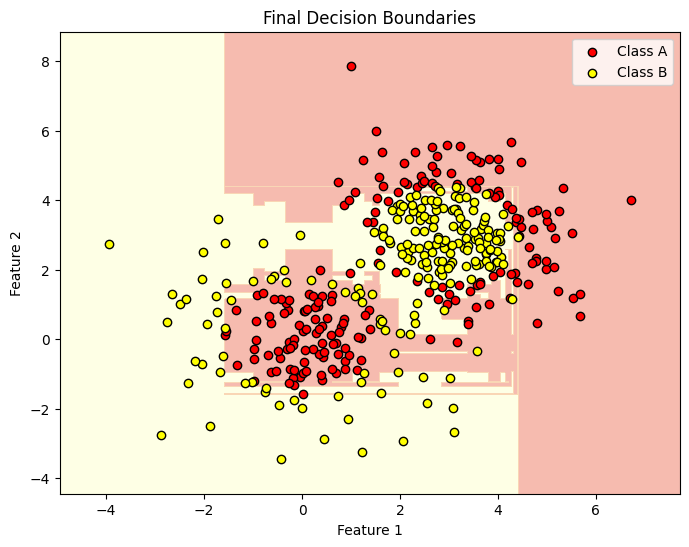

In [27]:

def plot_decision_boundaries_and_trees(X, y, n_estimators_to_plot):
  
    # Predefined colors for each class 
    colors = ['red', 'yellow']
    class_names = ['Class A', 'Class B']
    cmap = plt.cm.RdYlBu

    # Function to plot decision boundaries
    def plot_decision_boundary(clf, X, y, ax, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.4, levels=np.arange(-0.5, 3.5, 1), cmap=cmap)
        for i, color in enumerate(colors):
            idx = np.where(y == i)
            ax.scatter(X[idx, 0], X[idx, 1], c=color, label=class_names[i], edgecolor='k')
        ax.set_title(title)
        ax.legend(loc='upper right')

    # Plotting each estimator's decision boundary and decision tree
    fig, axes = plt.subplots(n_estimators_to_plot, 2, figsize=(12, n_estimators_to_plot*4))
    for i in range(n_estimators_to_plot):
        plot_decision_boundary(clf.estimators_[i], X, y, axes[i, 0], f"Estimator {i+1} Decision Boundaries")
        plot_tree(clf.estimators_[i], filled=True, ax=axes[i, 1])
        axes[i, 1].set_title(f"Estimator {i+1} Stump")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

    # Plotting the final decision boundary in a separate figure
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(clf, X, y, plt.gca(), "Final Decision Boundaries")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# Plotting decision boundaries and trees
plot_decision_boundaries_and_trees(X_train, y_train, n_estimators_to_plot=5)

In [19]:
# Calculate the accuracy score
y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy score on the training set: {accuracy}")

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score on the test set: {accuracy}")

Accuracy score on the training set: 0.9225
Accuracy score on the test set: 0.83


<Figure size 800x600 with 0 Axes>

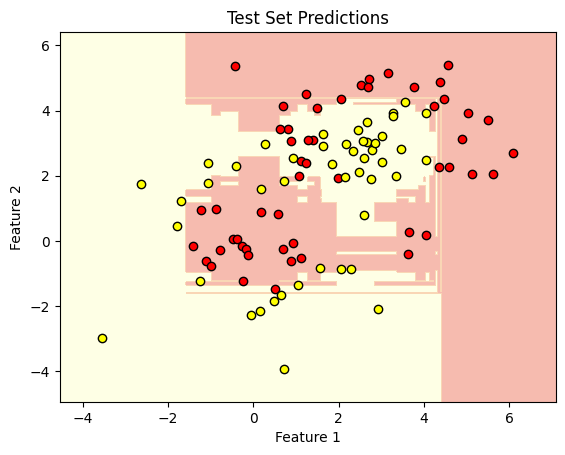

In [25]:
# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    colors = ['red', 'yellow']
    class_names = ['Class A', 'Class B']
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, levels=np.arange(-0.5, 3.5, 1), cmap=plt.cm.RdYlBu)
    for i, color in enumerate(colors):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, label=class_names[i], edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(clf, X_test, y_test, "Test Set Predictions")
plt.show()